In [36]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn
from sklearn.decomposition import PCA

# TSNE from Scikit-Learn
from sklearn.manifold import TSNE

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans

# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score


In [37]:
# Load international online transactions data from CSV
df = pd.read_csv("D:\Internship Work\Data Sceince Task 2\Task 2\Mall_Customers.csv")


In [38]:
#Dataframe dimension
df.shape

(200, 5)

In [39]:
# First 10 rows of data
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [40]:
# 1)Conduct Exploratory Data Analysis (EDA) 
# Preview data
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Info and summary
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

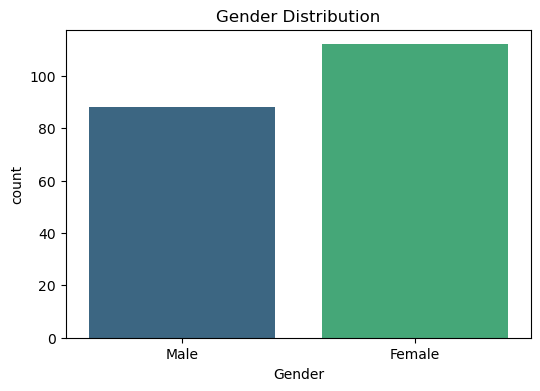

In [41]:
# Univariate Analysis
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", palette="viridis")
plt.title("Gender Distribution")
plt.show()

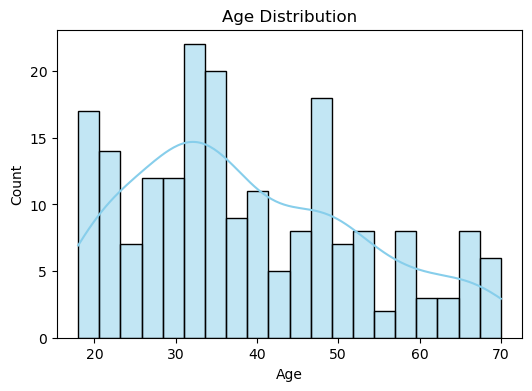

In [42]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

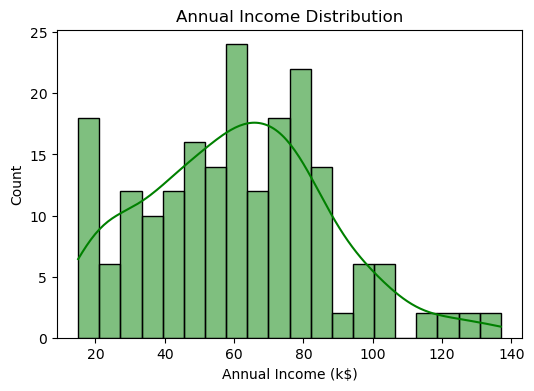

In [43]:
# Annual Income distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="green")
plt.title("Annual Income Distribution")
plt.show()

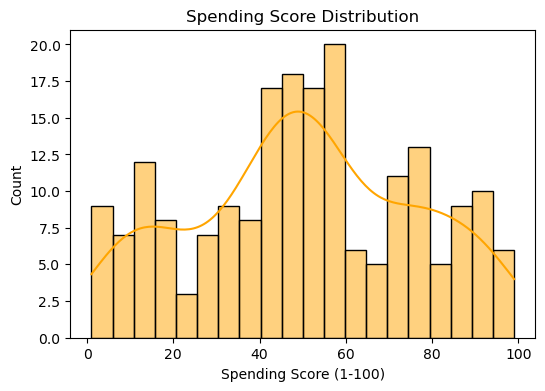

In [44]:
# Spending Score distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="orange")
plt.title("Spending Score Distribution")
plt.show()

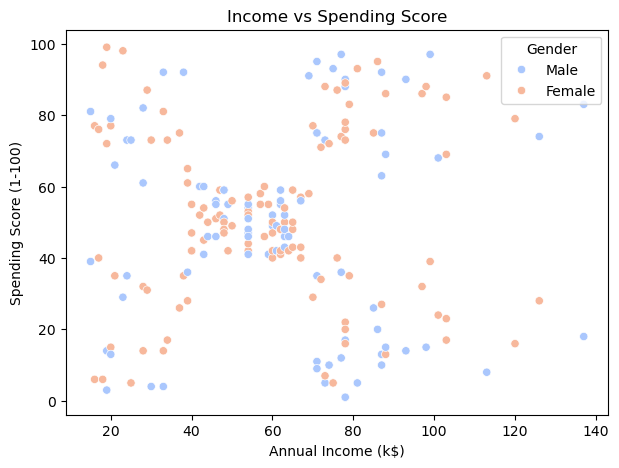

In [45]:
# Bivariate Analysis
# Income vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="coolwarm")
plt.title("Income vs Spending Score")
plt.show()

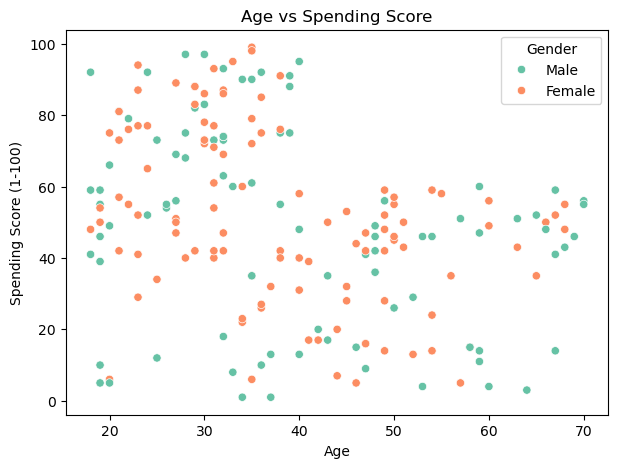

In [46]:
# Age vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender", palette="Set2")
plt.title("Age vs Spending Score")
plt.show()

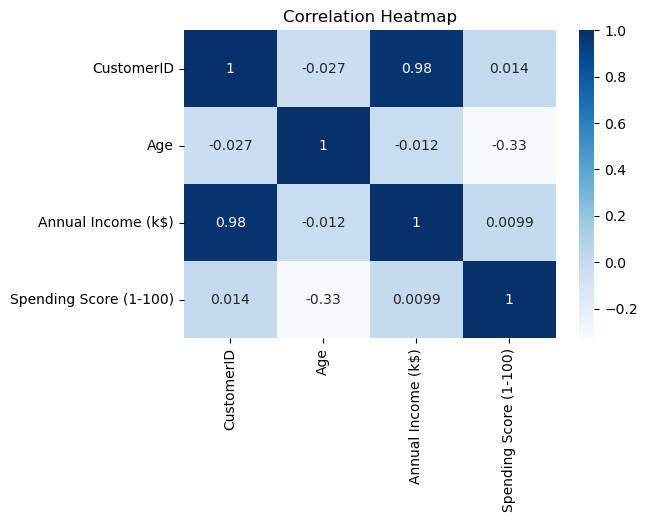

In [47]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [48]:
# 2) K-Means Clustering
# Select relevant features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [49]:
# Scale features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Elbow Method to find optimal k
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

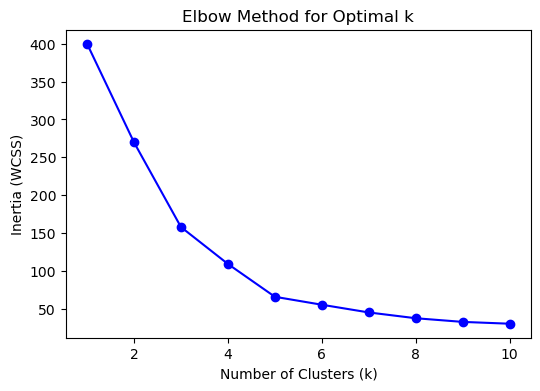

In [51]:
# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [52]:
# Apply K-Means with optimal clusters (say k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


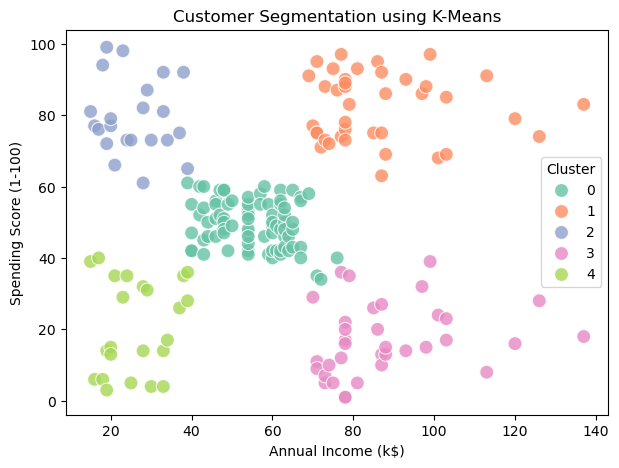

In [53]:
# Visualize Clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Cluster", palette="Set2", s=100, alpha=0.8)
plt.title("Customer Segmentation using K-Means")
plt.show()

In [54]:
# Cluster Summary
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [55]:
# 3) Use PCA or t-SNE to visualize the clusters
# Select features (Age, Income, Spending Score)
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [56]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Apply KMeans with chosen k (let's use 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

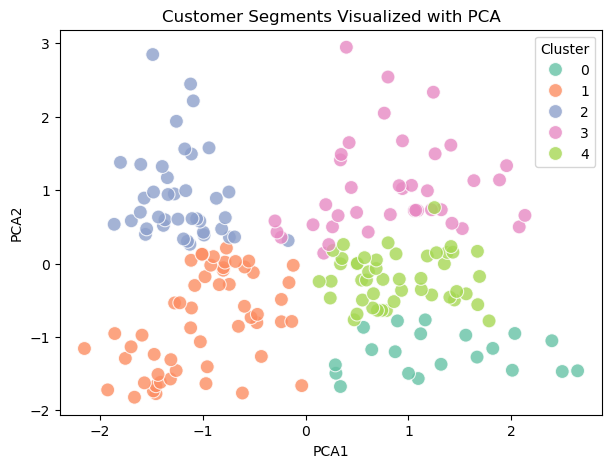

In [58]:
# PCA Visualization
pca = PCA(n_components=2)   
pca_result = pca.fit_transform(X_scaled)

df["PCA1"] = pca_result[:,0]
df["PCA2"] = pca_result[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100, alpha=0.8)
plt.title("Customer Segments Visualized with PCA")
plt.show()

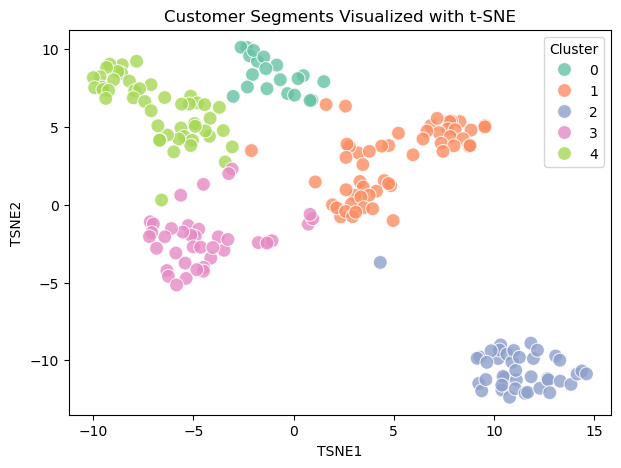

In [59]:
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(X_scaled)

df["TSNE1"] = tsne_result[:,0]
df["TSNE2"] = tsne_result[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Cluster", palette="Set2", s=100, alpha=0.8)
plt.title("Customer Segments Visualized with t-SNE")
plt.show()

In [60]:
# 4)Suggest Marketing Strategies
# Analyze cluster characteristics
cluster_profile = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("Cluster Profiles (Average values):")
print(cluster_profile)

Cluster Profiles (Average values):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


In [62]:
# Define strategies based on cluster behavior
strategies = {
    0: "High income, high spending: Premium loyalty programs, luxury product promotions.",
    1: "High income, low spending: Encourage spending via exclusive discounts & personalized offers.",
    2: "Low income, high spending: Focus on budget-friendly bundles, discounts, referral programs.",
    3: "Young age, moderate income: Trendy products, student offers, social media engagement.",
    4: "Older age, low spending: Promote essential products, trust-based marketing, senior benefits."
}

print("\nMarketing Strategy Suggestions:")
for cluster, strategy in strategies.items():
    print(f"Cluster {cluster}: {strategy}")


Marketing Strategy Suggestions:
Cluster 0: High income, high spending: Premium loyalty programs, luxury product promotions.
Cluster 1: High income, low spending: Encourage spending via exclusive discounts & personalized offers.
Cluster 2: Low income, high spending: Focus on budget-friendly bundles, discounts, referral programs.
Cluster 3: Young age, moderate income: Trendy products, student offers, social media engagement.
Cluster 4: Older age, low spending: Promote essential products, trust-based marketing, senior benefits.
